In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# figure root
fig_root = os.environ['HOME']+'/work/E3SMv1_Future_Projection/figures'
save_fig = True

In [3]:
e3sm_siarean_data = np.load('e3sm_siarean.npz')
esgf_siarean_data = np.load('esgf_siarean.npz')
e3sm_siareas_data = np.load('e3sm_siareas.npz')
esgf_siareas_data = np.load('esgf_siareas.npz')
e3sm_sivoln_data = np.load('e3sm_sivoln.npz')
esgf_sivoln_data = np.load('esgf_sivoln.npz')
e3sm_sivols_data = np.load('e3sm_sivols.npz')
esgf_sivols_data = np.load('esgf_sivols.npz')

In [4]:
esgf_colors = np.load('cmip6_colors.npz', allow_pickle=True)['esgf_colors'].flat[0]

In [5]:
def plot_ts(esgf_data, e3sm_data, esgf_colors, mon, ylabel, plabel=None, ax=None):
    if ax is None:
        ax = plt.gca()
    # month index
    imon = mon-1
    esgf_time = esgf_data['time'][imon::12]
    models = []
    for i, s in enumerate(esgf_data['label']):
        esgf_var = esgf_data['data'][i,imon::12]
        lb = s.split('_')[0]
        if lb not in models:
            models.append(lb)
            ax.plot(esgf_time, esgf_var, color=esgf_colors[lb], label=lb)
        else:
            ax.plot(esgf_time, esgf_var, color=esgf_colors[lb])

    e3sm_time = e3sm_data['time'][imon::12]
    for i, s in enumerate(e3sm_data['label']):
        e3sm_var = e3sm_data['data'][i,imon::12]
        if s.startswith('E3SM P'):
            lb = 'E3SM'
            color = 'k'
        elif s.startswith('E3SM GHG'):
            lb = 'E3SM'
            color = 'gray'
        if s.endswith('1'):
            ax.plot(e3sm_time, e3sm_var, color=color, label=lb)
        else:
            ax.plot(e3sm_time, e3sm_var, color=color)
    if plabel is not None:
        ax.text(0.7, 0.85, plabel, transform=ax.transAxes, fontsize=12, color='k', va='bottom')
    ax.set_ylabel(ylabel)
    ax.set_xlim([e3sm_time[0], e3sm_time[-1]])


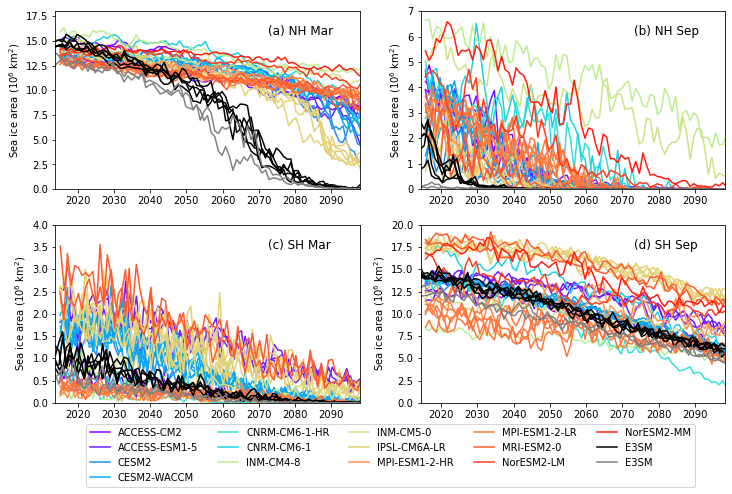

In [6]:
fig, axarr = plt.subplots(2,2)
fig.set_size_inches([12, 8])

ylabel = 'Sea ice area ($10^6$ km$^2$)'
plot_ts(esgf_siarean_data, e3sm_siarean_data, esgf_colors,
        mon=3, ylabel=ylabel, plabel='(a) NH Mar', ax=axarr[0,0])
plot_ts(esgf_siarean_data, e3sm_siarean_data, esgf_colors,
        mon=9, ylabel=ylabel, plabel='(b) NH Sep', ax=axarr[0,1])
plot_ts(esgf_siareas_data, e3sm_siareas_data, esgf_colors,
        mon=3, ylabel=ylabel, plabel='(c) SH Mar', ax=axarr[1,0])
plot_ts(esgf_siareas_data, e3sm_siareas_data, esgf_colors,
        mon=9, ylabel=ylabel, plabel='(d) SH Sep', ax=axarr[1,1])

axarr[0,0].set_ylim([0,18])
axarr[0,1].set_ylim([0,7])
axarr[1,0].set_ylim([0,4])
axarr[1,1].set_ylim([0,20])

plt.legend(loc='lower center',  bbox_to_anchor=(-0.1, -0.5), ncol=5)

plt.subplots_adjust(bottom=0.2)
# save figure
if save_fig:
    figname = fig_root+'/CMIP6_ScenarioMIP_SeaIceArea.png'
    fig.savefig(figname, dpi = 300)

NorESM2-MM_r1i1p1f1


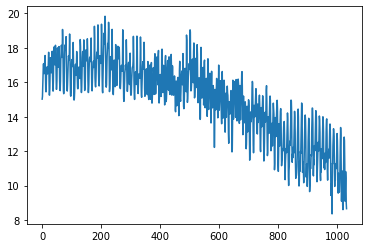

In [7]:
# sea ice area hs very small seasonal cycle for NorESM2 models
print(esgf_siareas_data['label'][-1])
plt.plot(esgf_siareas_data['data'][-1,:])

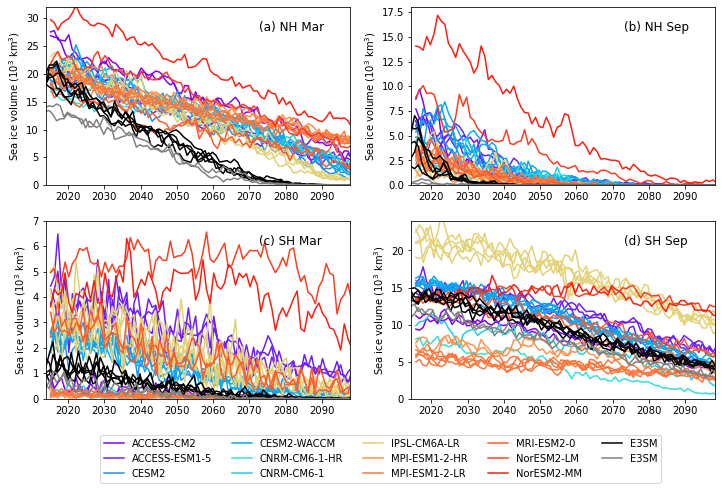

In [8]:
fig, axarr = plt.subplots(2,2)
fig.set_size_inches([12, 8])

ylabel = 'Sea ice volume ($10^3$ km$^3$)'
plot_ts(esgf_sivoln_data, e3sm_sivoln_data, esgf_colors,
        mon=3, ylabel=ylabel, plabel='(a) NH Mar', ax=axarr[0,0])
plot_ts(esgf_sivoln_data, e3sm_sivoln_data, esgf_colors,
        mon=9, ylabel=ylabel, plabel='(b) NH Sep', ax=axarr[0,1])
plot_ts(esgf_sivols_data, e3sm_sivols_data, esgf_colors,
        mon=3, ylabel=ylabel, plabel='(c) SH Mar', ax=axarr[1,0])
plot_ts(esgf_sivols_data, e3sm_sivols_data, esgf_colors,
        mon=9, ylabel=ylabel, plabel='(d) SH Sep', ax=axarr[1,1])

axarr[0,0].set_ylim([0,32])
axarr[0,1].set_ylim([0,18])
axarr[1,0].set_ylim([0,7])
axarr[1,1].set_ylim([0,24])

plt.legend(loc='lower center',  bbox_to_anchor=(-0.1, -0.5), ncol=5)

plt.subplots_adjust(bottom=0.2)
# save figure
if save_fig:
    figname = fig_root+'/CMIP6_ScenarioMIP_SeaIceVolume.png'
    fig.savefig(figname, dpi = 300)